In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('data/sales_data.csv')
df.head()

<ipython-input-2-641b43f04074>:1: DtypeWarning: Columns (1,3,4,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/sales_data.csv')


,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue;;;Rev/Age
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950;;;50
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950;;;
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401;;;
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088;;;
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418;;;


In [ ]:
sales = pd.read_csv('data/sales_data.csv', parse_dates=['Date'])

<ipython-input-3-28a9960ef71d>:1: DtypeWarning: Columns (1,3,4,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv('data/sales_data.csv', parse_dates=['Date'])


# Los datos de un vistazo

**aqui presenta el marco de datos que hemos creado**


In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue;;;Rev/Age
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950;;;50
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950;;;
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401;;;
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088;;;
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418;;;


# Agregar y calcular una nueva columna Calculated_Revenue

Utilice esta fórmula

**Calculated_Revenue = Cost+Profit**

In [ ]:
sales['Calculated_Revenue'] = sales['Cost'] + sales['Profit']
sales['Calculated_Revenue'].head()

,Calculated_Revenue
0,360590
1,360590
2,10351366
3,9001188
4,180238


In [ ]:
# Check if 'Revenue' column exists, and if not, calculate it from other columns
if 'Revenue' not in sales.columns:
    sales['Revenue'] = sales['Cost'] + sales['Profit']  # Assuming Revenue is calculated this way

(sales['Calculated_Revenue'] != sales['Revenue']).sum()

50714

In [ ]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue;;;Rev/Age,Calculated_Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950;;;50,360590
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950;;;,360590
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401;;;,10351366
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088;;;,9001188
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418;;;,180238


haremos un histograma rapido de los ingresos

object
object
object


<Axes: ylabel='Frequency'>

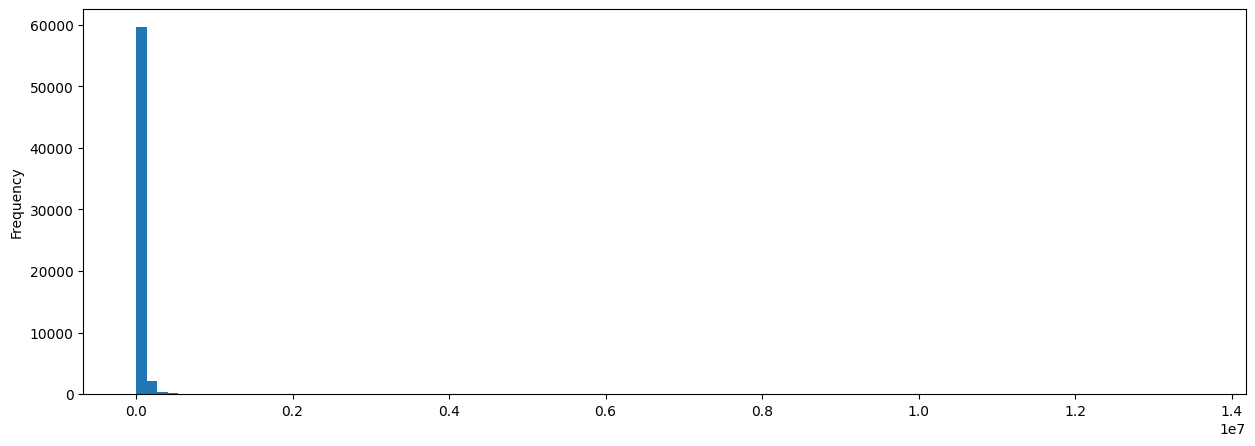

In [ ]:
# Check data types of relevant columns
print(sales['Cost'].dtype)
print(sales['Profit'].dtype)
print(sales['Revenue'].dtype)

# Convert 'Cost', 'Profit', and 'Revenue' columns to numeric type if necessary
sales['Cost'] = pd.to_numeric(sales['Cost'], errors='coerce')
sales['Profit'] = pd.to_numeric(sales['Profit'], errors='coerce')
sales['Revenue'] = pd.to_numeric(sales['Revenue'], errors='coerce')

# Now try plotting again
sales['Revenue'].plot(kind='hist', bins=100, figsize=(15,5))



modificar todos los valores Unit_price agregándoles un impuesto del 3%

In [ ]:
sales['Unit_Price'].head()

,Unit_Price
0,120
1,120
2,120
3,120
4,120


In [ ]:
# Convert 'Unit_Price' column to numeric type
sales['Unit_Price'] = pd.to_numeric(sales['Unit_Price'], errors='coerce')

# Now perform the multiplication
sales['Unit_Price'] = sales['Unit_Price'] * 1.03


In [ ]:
sales['Unit_Price'].head()

,Unit_Price
0,123.6
1,123.6
2,123.6
3,123.6
4,123.6


# Selección e indexación

Obtenga todas las ventas realizadas en el estado de Kentucky

In [ ]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue;;;Rev/Age,Calculated_Revenue,Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63.0,45.0,108;;;,4563,4563.0
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,123.60,63.0,45.0,108;;;,4563,4563.0
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22.66,142.0,96.0,238;;;,96142,96142.0
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22.66,165.0,112.0,277;;;,112165,112165.0
79670,2014-04-16,16.0,April,2014.0,40.0,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2.0,11.0,30.90,32.0,22.0,54;;;,54.0,54.0
79671,2014-04-16,16.0,April,2014.0,40.0,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21.0,11.0,30.90,336.0,231.0,567;;;,567.0,567.0
79672,2016-04-16,16.0,April,2016.0,40.0,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1.0,11.0,30.90,16.0,11.0,27;;;,27.0,27.0
79673,2016-04-16,16.0,April,2016.0,40.0,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18.0,11.0,30.90,288.0,198.0,486;;;,486.0,486.0


Obtenga los ingresos medios del grupo de ventas Adultos (35-64)

In [ ]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)')]['Revenue'].mean()

38618.113939749994

¿Cuántos registros pertenecen al grupo de edad Jóvenes (<25) o Adultos (35-64)?

In [ ]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

41389

Obtenga los ingresos medios del grupo de ventas Adultos (35-64) en Estados Unidos

In [ ]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States')]['Revenue'].mean()

37948.35356942102

Aumentar los ingresos en un 10% por cada venta realizada en Francia

In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

,Revenue
50,360427.0
51,360427.0
52,12601697.0
53,12151636.0
60,270356.0


In [ ]:
sales.loc[sales['Country'] == 'France', 'Revenue'] * 1.1

,Revenue
50,396469.7
51,396469.7
52,13861866.7
53,13366799.6
60,297391.6
...,...
108369,27.5
108370,23.1
108371,8.8
108372,27.5


In [ ]:
sales.loc[sales['Country']=='France', 'Revenue'].head()

,Revenue
50,360427.0
51,360427.0
52,12601697.0
53,12151636.0
60,270356.0
